<a href="https://colab.research.google.com/github/ricardogalindoestevez-arch/prueba/blob/main/Serie0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 Obtener los datos de la acción de BBVA y realizar un análisis de la serie temporal usando Python y Yahoo Finance. A continuación, te muestro los pasos:

**Paso 1: Instalar las bibliotecas necesarias**
Primero, debes instalar algunas bibliotecas en tu entorno de trabajo si no las tienes. Las más comunes son:

yfinance: Para obtener datos financieros de Yahoo Finance.
pandas: Para manejar los datos en formato de tablas (DataFrame).
matplotlib o plotly: Para visualizar los datos.


In [1]:
pip install yfinance pandas matplotlib seaborn


**Paso 2: Importar las bibliotecas**
Una vez instaladas, puedes importar las bibliotecas en tu script de Python:

In [ ]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt


**Paso 3: Descargar los datos de BBVA**
Utilizaremos la API de Yahoo Finance para descargar los precios de las acciones de BBVA. El símbolo de la acción de BBVA en Yahoo Finance es BBVA.MC.

In [ ]:
# Descargar datos de BBVA de los últimos 6 meses
bbva = yf.download('BBVA.MC', period='6mo', interval='1d')
# Preparar los datos: Usaremos la columna de 'Precio de Cierre Ajustado'
prices = bbva['Adj Close']
# Mostrar las primeras filas del DataFrame
print(bbva.head())


/tmp/ipython-input-430433104.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  bbva = yf.download('BBVA.MC', period='6mo', interval='1d')
[*********************100%***********************]  1 of 1 completed


KeyError: 'Adj Close'

**Paso 4: Visualizar la serie temporal**
Podemos graficar los precios de cierre de cada día para observar la evolución de la acción en los últimos 6 meses:

Preparar los datos: Usaremos la columna de 'Precio de Cierre Ajustado'

In [ ]:
# Graficar los precios de cierre ajustados

plt.figure(figsize=(10, 6))
plt.plot(prices.index, prices, label='BBVA - Precio de Cierre Ajustado')
plt.title('Evolución de la acción de BBVA en los últimos 6 meses')
plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre Ajustado (€)')
plt.grid(True)
plt.legend()
plt.show()


NameError: name 'plt' is not defined

# Nueva sección

**Paso 5: Análisis de la serie temporal**
Descomposición: Puedes descomponer la serie temporal en tendencia, estacionalidad y residuo.
Predicción: Se puede aplicar un modelo de ARIMA o Prophet para predecir el futuro comportamiento.

In [ ]:
pip install statsmodels


**Paso 6: (Opcional) Modelado con ARIMA**
Para hacer predicciones con ARIMA, puedes usar la biblioteca statsmodels.

El modelo ARIMA tiene tres parámetros principales:

p: Número de términos autorregresivos (AR).
d: Número de diferencias aplicadas a los datos (para hacerlos estacionarios).
q: Número de términos de media móvil (MA).


In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# Crear el modelo ARIMA (puedes ajustar los parámetros p, d, q)
model = ARIMA (prices, order=(5, 1, 2))
model_fit = model.fit()

# Hacer predicciones para los próximos 30 días
forecast = model_fit.forecast(steps=30)
print(forecast)


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/pyth

130    9.165816
131    9.145763
132    9.186464
133    9.177589
134    9.134681
135    9.183281
136    9.164634
137    9.140555
138    9.190477
139    9.157415
140    9.145763
141    9.191471
142    9.149215
143    9.153182
144    9.190924
145    9.142939
146    9.161417
147    9.187584
148    9.138509
149    9.169829
150    9.182145
151    9.136516
152    9.177614
153    9.175031
154    9.137067
155    9.184055
156    9.166945
157    9.140106
158    9.188566
159    9.158638
Name: predicted_mean, dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


Con estos pasos, podrás obtener los datos, visualizarlos y empezar a analizar la serie temporal de la acción de BBVA en los últimos 6 meses.

**Paso 7: Visualizar la predicción**
Es importante graficar los resultados para ver cómo se comportan las predicciones en relación con los datos históricos.

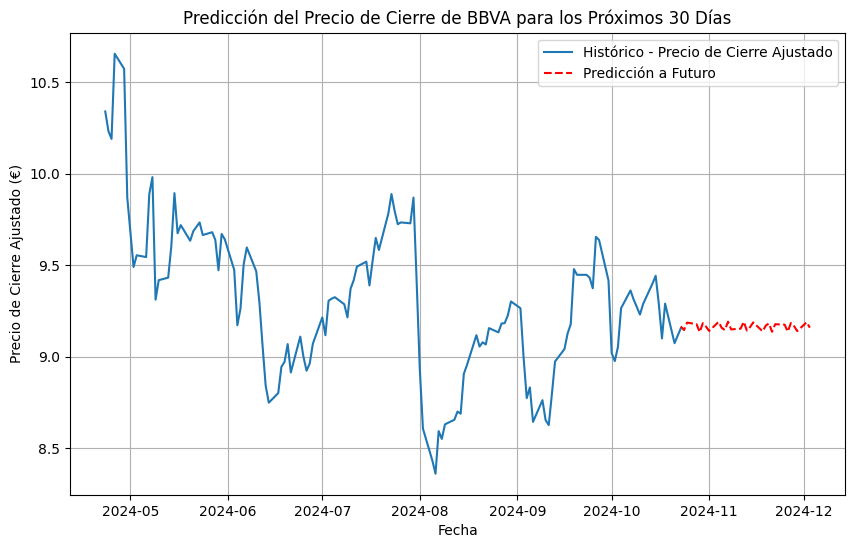

In [ ]:
# Graficar los datos históricos y las predicciones
plt.figure(figsize=(10, 6))

# Graficar precios históricos
plt.plot(prices.index, prices, label='Histórico - Precio de Cierre Ajustado')

# Crear un índice de fechas para los próximos 30 días
future_dates = pd.date_range(start=prices.index[-1], periods=30, freq='B')

# Graficar predicciones
plt.plot(future_dates, forecast, label='Predicción a Futuro', linestyle='--', color='red')

# Configuración del gráfico
plt.title('Predicción del Precio de Cierre de BBVA para los Próximos 30 Días')
plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre Ajustado (€)')
plt.grid(True)
plt.legend()
plt.show()


**Paso 8: Descomponer la serie temporal**
Podemos usar el método seasonal_decompose para dividir la serie en sus componentes de tendencia, estacionalidad y residuo. Aquí utilizamos la opción model='additive' para asumir que la serie es aditiva (tendencia + estacionalidad + residuo).

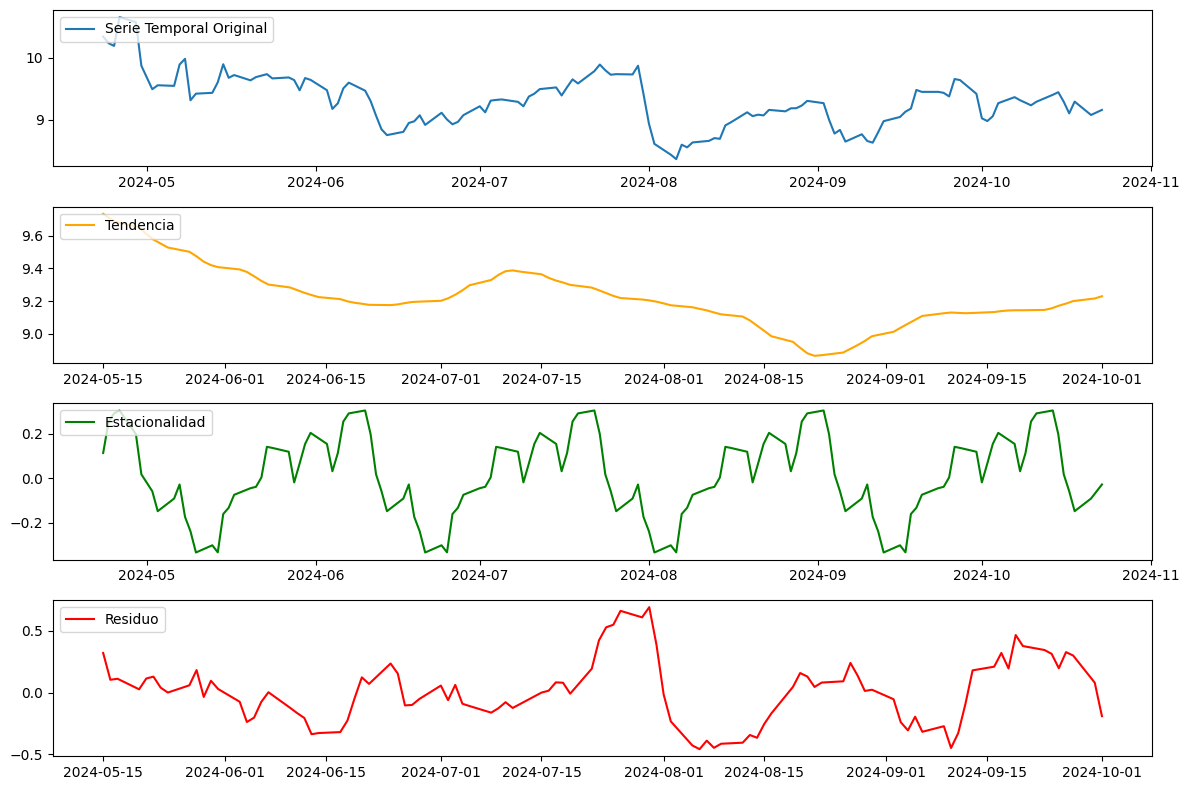

In [ ]:
# Realizar la descomposición (Additive model)

from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(prices, model='additive', period=30)  # Asumimos una periodicidad de 30 días

# Extraer los componentes
tendencia = decomposition.trend
estacionalidad = decomposition.seasonal
residuo = decomposition.resid

# Graficar los componentes
plt.figure(figsize=(12, 8))

plt.subplot(411)
plt.plot(prices, label='Serie Temporal Original')
plt.legend(loc='upper left')

plt.subplot(412)
plt.plot(tendencia, label='Tendencia', color='orange')
plt.legend(loc='upper left')

plt.subplot(413)
plt.plot(estacionalidad, label='Estacionalidad', color='green')
plt.legend(loc='upper left')

plt.subplot(414)
plt.plot(residuo, label='Residuo', color='red')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()


**Explicación de los resultados:**
Serie temporal original: Es el gráfico con los precios de cierre ajustados de la acción BBVA a lo largo de los últimos 6 meses.
Tendencia: Muestra la dirección general de los precios, eliminando las fluctuaciones a corto plazo.
Estacionalidad: Refleja patrones repetitivos que ocurren a intervalos regulares, como ciclos semanales o mensuales.
Residuo: Es lo que queda después de eliminar la tendencia y la estacionalidad, y representa las variaciones aleatorias.
¿Qué podemos hacer a continuación?
Analizar cómo se comporta cada componente por separado.
Ver si el residuo es completamente aleatorio o contiene patrones que puedan ser modelados.
Si la serie tiene una fuerte estacionalidad, podríamos utilizar un modelo estacional como SARIMA para realizar predicciones más precisas.